In [7]:
import numpy as np
import random
import string
from wheezy.captcha.image import warp, rotate, offset, background, text, curve, noise, smooth, captcha
from skimage.io import imshow
from sklearn.model_selection import train_test_split

In [8]:
%matplotlib inline

In [9]:
real = imshow("captcha_prueba.jpeg").get_array().data

FileNotFoundError: [Errno 2] No such file or directory: 'captcha_prueba.jpeg'

In [10]:
# Captcha Generator Settings
fonts=['/Users/cortega/Downloads/comic-sans-ms_53a8778a817839ef2dbc5dc94ce14334.ttf']
text_drawings = [
                #warp(dx_factor=0.27, dy_factor=0.21),
                rotate(angle=25),
                offset(dx_factor=0.1, dy_factor=0.2),
                ]
drawings=[
         background(color='#dcdcdc'),
         text(fonts=fonts, font_sizes=(28, 28, 28), drawings=text_drawings, color='#32fa32', squeeze_factor=1),
         #curve(),
         noise(number=60, color='#69d748', level=2),
         smooth(),
         ]

generator = captcha(drawings=drawings, width=150, height=50)

In [11]:
def captcha_gen(string_size, generator):
    string = chars_generator(string_size)
    img = generator(string)
    pix = np.array(img)
    return pix, string

In [12]:
def chars_generator(size=4, chars=string.digits + string.ascii_uppercase):
    return ''.join(random.choice(chars) for _ in range(size))

In [13]:
def data_gen(size=10000, captcha_width=150, captcha_height=50, string_size=4):
    char_set = list(string.digits + string.ascii_uppercase)
    char_set_size = len(char_set)
    
    X = np.zeros(shape=(size,captcha_height,captcha_width,3), dtype='uint8')
    y = np.zeros(shape=(size, string_size, char_set_size))
    
    for i in range(size):
        X[i], string_ = captcha_gen(string_size, generator)
        for j, char in enumerate(string_):
            k = char_set.index(char)
            y[i,j,k] += 1
    
    X = X.astype('float32')

    return X, y

In [14]:
X, y = data_gen(size=10)

In [15]:
X[0].shape, y[0].shape

((50, 150, 3), (4, 36))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train /= 255
X_test /= 255

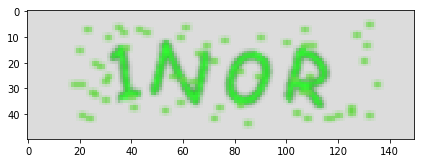

In [18]:
imshow(X_train[2])

In [19]:
y_train[2]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [20]:
np.save('data/train_inputs',X_train)
np.save('data/train_targets',y_train)

np.save('data/test_inputs',X_test)
np.save('data/test_targets',y_test)

FileNotFoundError: [Errno 2] No such file or directory: 'data/train_inputs.npy'

In [21]:
char_set = list(string.digits + string.ascii_uppercase)
char_set_size = len(char_set)

In [22]:
char_set_size

36

In [26]:
y_train.shape

(8, 4, 36)